In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [3]:
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

In [4]:
X = iris_df.iloc[:, :2] 
y = iris_df.iloc[:,-1]

In [5]:
X

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [6]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train

,sepal length (cm),sepal width (cm)
22,4.6,3.6
15,5.7,4.4
65,6.7,3.1
11,4.8,3.4
42,4.4,3.2
...,...,...
71,6.1,2.8
106,4.9,2.5
14,5.8,4.0
92,5.8,2.6


In [15]:
X_test

,sepal length (cm),sepal width (cm)
73,6.1,2.8
18,5.7,3.8
118,7.7,2.6
78,6.0,2.9
76,6.8,2.8
31,5.4,3.4
64,5.6,2.9
141,6.9,3.1
68,6.2,2.2
82,5.8,2.7


In [16]:
y_train

22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: target, Length: 120, dtype: int32

In [17]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: target, dtype: int32

In [4]:
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [5]:
y_pred = svm_classifier.predict(X_test)

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 90.00%


In [7]:
h = .02  

In [8]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

In [9]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

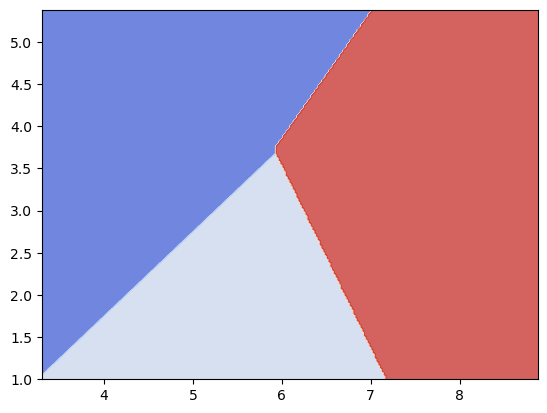

In [10]:
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)